In [2]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

# Replace 'path_to_your_mat_file.mat' with the actual path to your .mat file


# Load the MATLAB file
mat_data = loadmat('B0_map.mat')

# mat_data is now a dictionary with variable names as keys and loaded matrices as values.
# For example, to access a variable named 'your_variable_name' stored in your .mat file, use:
B0_field = mat_data['B0_map']
B0_field_rs = np.pad(B0_field, ((0, 1), (0, 1)), mode='constant', constant_values=0)

# new_array is now 65x65 with the padding added to the bottom and right


# Note: MATLAB structs will be loaded as numpy structured arrays, which might require
# different handling compared to regular numpy arrays.


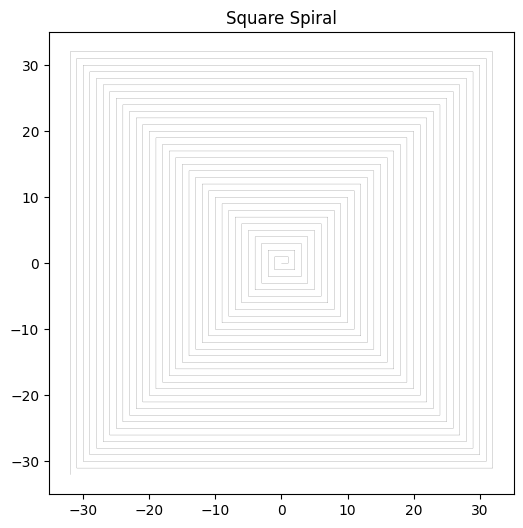

[[0. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [3]:


# Function to generate square spiral coordinates
def square_spiral(n):
    dx, dy = 1, 0  # Initial movement direction
    x, y = 0, 0  # Starting point
    series_len = 1  # Initial length of a series of moves in the same direction
    initial_matrix = np.zeros((64,64))

    # Lists to hold the x and y coordinates
    xs, ys = [x], [y]

    for _ in range(n):
        for _ in range(2):  # There are two segments with the same length in each loop
            for _ in range(series_len):
                x, y = x + dx, y + dy
                xs.append(x)
                ys.append(y)
                initial_matrix[x,y] = 1
            # Change direction: turn right
            dx, dy = -dy, dx
        series_len += 1  # Increase the length of the next segment

    return xs, ys, initial_matrix

# Number of steps in the spiral
n_steps = 64

# Generate spiral coordinates
xs, ys, initial_matrix = square_spiral(n_steps)

# Plot the square spiral
plt.figure(figsize=(6, 6))
plt.plot(xs, ys,linewidth = 0.1, color = 'black')
plt.axis('equal')
plt.title('Square Spiral')
plt.show()

print(initial_matrix)




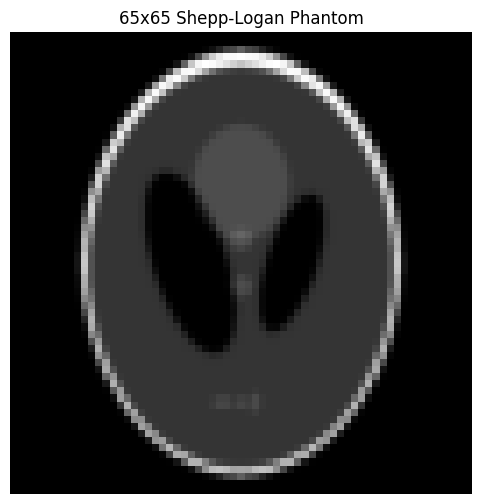

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import shepp_logan_phantom
from skimage.transform import resize

# Generate the Shepp-Logan phantom at a high resolution
phantom_high_res = shepp_logan_phantom()

# Resize the phantom to 65x65
phantom_65x65 = resize(phantom_high_res, (65, 65), anti_aliasing=True)

# Display the phantom
plt.figure(figsize=(6, 6))
plt.imshow(phantom_65x65, cmap='gray')
plt.title('65x65 Shepp-Logan Phantom')
plt.axis('off')
plt.show()


In [5]:

def square_spiral_order(image):
    # Get image dimensions
    height, width = image.shape

    # Calculate center coordinates
    center_x, center_y = width // 2, height // 2

    # Initialize variables
    spiral_ordered_data = []
    direction = 0  # 0: right, 1: down, 2: left, 3: up
    steps = 1  # Number of steps to move in the current direction
    step_count = 0  # Count of steps taken in the current direction

    # Function to update direction
    def update_direction():
        nonlocal direction, step_count
        direction = (direction + 1) % 4  # Update direction
        if direction % 2 == 0:  # Increment steps every two turns
            step_count += 1

    # Function to move in the current direction
    def move():
        nonlocal center_x, center_y
        if direction == 0:  # Right
            center_x += 1
        elif direction == 1:  # Down
            center_y += 1
        elif direction == 2:  # Left
            center_x -= 1
        elif direction == 3:  # Up
            center_y -= 1

    # Iterate through pixels in spiral order
    for _ in range(height * width):
        if 0 <= center_x < width and 0 <= center_y < height:
            spiral_ordered_data.append(image[center_y, center_x])
        move()
        step_count += 1
        if step_count == steps:  # Change direction when steps are completed
            update_direction()
            step_count = 0
            if direction % 2 == 0:  # Increment steps every two turns
                steps += 1

    return spiral_ordered_data










In [6]:

# Create a 65x65 map filled with zeros
map_65x65 = np.zeros((65, 65))

# Define the center and radius of the circle
circle_center = (32, 48)  # (x, y) coordinates
circle_radius = 15

# Create a mesh grid of x and y coordinates
x_coords, y_coords = np.meshgrid(np.arange(65), np.arange(65))

# Calculate the distance from each point to the center of the circle
distances = np.sqrt((x_coords - circle_center[0])**2 + (y_coords - circle_center[1])**2)

# Set the values inside the circle to 1000
map_65x65[distances <= circle_radius] = 1000

# Print the map
print(map_65x65)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
map_65x65_all = np.ones((65, 65))
map_65x65_all = map_65x65_all * 1043
print(map_65x65_all)

[[1043. 1043. 1043. ... 1043. 1043. 1043.]
 [1043. 1043. 1043. ... 1043. 1043. 1043.]
 [1043. 1043. 1043. ... 1043. 1043. 1043.]
 ...
 [1043. 1043. 1043. ... 1043. 1043. 1043.]
 [1043. 1043. 1043. ... 1043. 1043. 1043.]
 [1043. 1043. 1043. ... 1043. 1043. 1043.]]


In [8]:
phantom_65x65_pc = np.zeros((65, 65))
phantom_65x65_pc[65//2][65//2] = 1

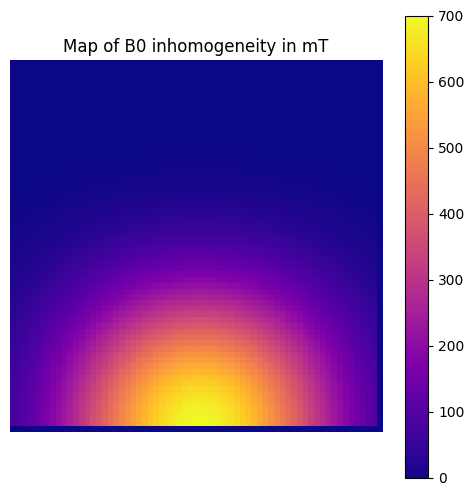

In [9]:
x, y = np.meshgrid(np.linspace(-1, 1, phantom_65x65.shape[1]), np.linspace(-1, 1, phantom_65x65.shape[0]))

b0_field_map = np.sin(x * np.pi) 
plt.figure(figsize=(6, 6))
plt.imshow(B0_field_rs, cmap='plasma')
plt.axis('off')
plt.title('Map of B0 inhomogeneity in mT')
cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")
plt.show()

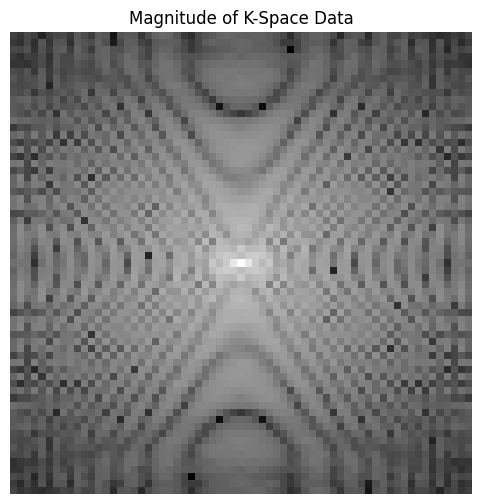

In [17]:
from numpy.fft import fftshift, ifftshift, fftn, ifftn
# Compute the 2D Fourier Transform to get the k-space data
k_space_data = fftn(ifftshift(phantom_65x65))
k_space_data_shifted = fftshift(k_space_data)  # Shift the zero frequency component to the center
square_spiral_test_data = square_spiral_order(k_space_data)

# Display the magnitude of the k-space data
plt.figure(figsize=(6, 6))
plt.imshow(np.log(np.abs(k_space_data_shifted)), cmap='gray')
plt.axis('off')
plt.title('Magnitude of K-Space Data')
plt.show()

In [11]:
# Defining gradient strengths
FOV = 0.0065
res = 0.001
gamma_bar = 42580000
grad_max = 0.8
t_ro = 1 / (gamma_bar*grad_max*res); # calculate readout duration
t_res = t_ro / (FOV/res); # calculate time resolution for measurement

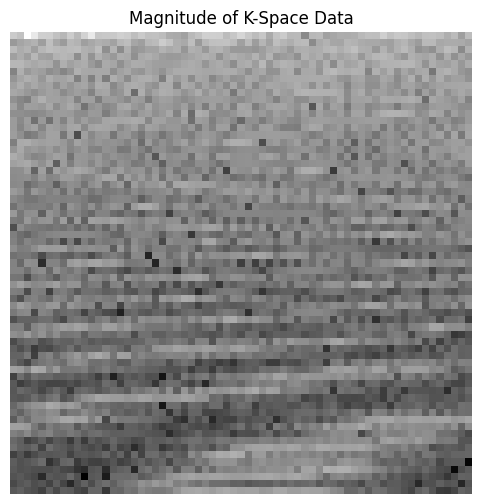

In [12]:
# Assuming N, meas_start_pt, test_obj, B0_map, t_res, and traj_map are predefined
N = 65
ksp_meas = np.zeros((N, N), dtype = complex)
t_spiral = np.zeros(len(phantom_65x65_pc.flatten()), dtype = complex)  # Initialize k-space measurement array

for t in range(len(phantom_65x65.flatten())):
    # Calculate the complex image signal at time t
    obj_cpx = phantom_65x65 * np.exp(1j * B0_field_rs* 2 * np.pi * t * t_res)
    
    # Take its Fourier transform
    ksp_cpx = np.fft.ifftshift(np.fft.fft2(np.fft.fftshift(obj_cpx)))
    ksp_spiral = square_spiral_order(ksp_cpx)
    t_spiral[t] = ksp_spiral[t]
    
# Measure the signal at our current k-space location
    
spiral_img = np.reshape(t_spiral,(65,65))
plt.figure(figsize=(6, 6))
plt.imshow(np.log(np.abs(spiral_img)), cmap='gray')
plt.axis('off')
plt.title('Magnitude of K-Space Data')
plt.show()


In [13]:
def reverse_square_spiral_order(ordered_data, height, width):
    array = np.zeros((height, width), dtype = complex)
    center_x, center_y = width // 2, height // 2
    direction = 0
    steps = 1
    step_count = 0
    data_index = 0

    def update_direction():
        nonlocal direction, step_count
        direction = (direction + 1) % 4
        if direction % 2 == 0:
            step_count += 1

    def move():
        nonlocal center_x, center_y
        if direction == 0:
            center_x += 1
        elif direction == 1:
            center_y += 1
        elif direction == 2:
            center_x -= 1
        elif direction == 3:
            center_y -= 1

    for _ in range(height * width):
        if 0 <= center_x < width and 0 <= center_y < height:
            array[center_y, center_x] = ordered_data[data_index]
            data_index += 1
        move()
        step_count += 1
        if step_count == steps:
            update_direction()
            step_count = 0
            if direction % 2 == 0:
                steps += 1

    return array




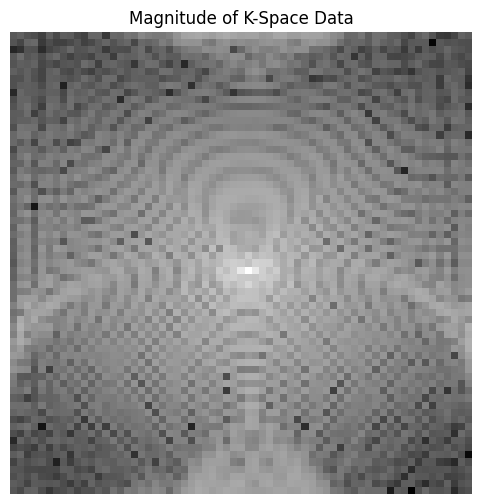

In [18]:

reconstructed_array = reverse_square_spiral_order(t_spiral.flatten(), 65, 65)

# Print the reconstructed array
spiral_img = np.reshape(reconstructed_array.flatten(),(65,65))
plt.figure(figsize=(6, 6))
plt.imshow((np.log(np.abs(reconstructed_array))), cmap='gray')
plt.axis('off')
plt.title('Magnitude of K-Space Data')
plt.show()



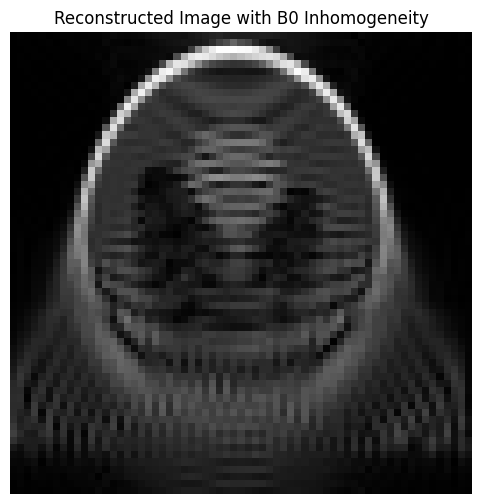

In [15]:
image_reconstructed = fftshift(ifftn(reconstructed_array))

# Display the reconstructed image
plt.figure(figsize=(6, 6))
plt.imshow(np.abs(image_reconstructed), cmap='gray')
plt.axis('off')
plt.title('Reconstructed Image with B0 Inhomogeneity')
plt.show()
